In [ ]:
# integrazione di equazioni differenziali

In [1]:
from scipy.integrate import odeint

In [2]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y,t0,...)
    
    where y can be a vector.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to 

# $\dot y =  -y$
# $y(t=0) = y_0$

# $y(t) = y(0) e^{-t}$

In [55]:
y0 = 10.0

In [79]:
time = linspace(0.0, 3.0, 15)

In [80]:
def derivata(yt, t):
    return -yt

In [81]:
yt = odeint(derivata, y0, time)

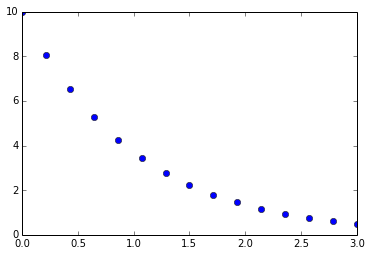

In [82]:
plot(time, yt, 'o')

In [83]:
yt

array([[ 10.        ],
       [  8.07117752],
       [  6.51439067],
       [  5.25788034],
       [  4.24372867],
       [  3.42518866],
       [  2.76453055],
       [  2.23130167],
       [  1.80092314],
       [  1.453557  ],
       [  1.17319163],
       [  0.94690377],
       [  0.76426282],
       [  0.61685008],
       [  0.49787063]])

In [86]:
y_obs = yt[:,0] +randn(15)

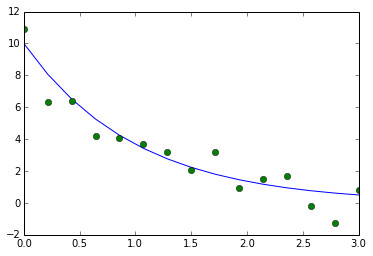

In [87]:
plot(time, yt)
plot(time, y_obs, 'o');

In [88]:
from scipy.optimize import curve_fit

In [89]:
y_obs

array([ 10.88659787,   6.32821478,   6.3660363 ,   4.2223444 ,
         4.0429453 ,   3.70175018,   3.21973637,   2.04658067,
         3.21580468,   0.91693176,   1.50173276,   1.68132725,
        -0.19796795,  -1.27168863,   0.814779  ])

In [90]:
def decadimento(tempo, k):
    return exp(-k*tempo)*10.0

In [91]:
p, v = curve_fit(decadimento, time, y_obs, p0=[0.9])

In [92]:
p

array([ 1.04803549])

In [93]:
sqrt(v)

array([[ 0.09621133]])

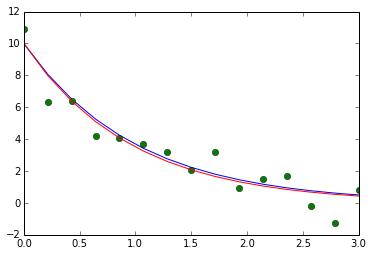

In [94]:
plot(time, yt)
plot(time, y_obs, 'o');

y_hat = decadimento(time, p)
plot(time, y_hat, '-r');

In [99]:
def ydata_estimation(tempo, k):
    def dy(y, t):
        return -k*y
    yt = odeint(dy, 10.0, tempo)
    return yt.ravel()

p, v = curve_fit(ydata_estimation, time, y_obs, p0=[0.9])

In [100]:
p

array([ 1.04803552])

In [101]:
v

array([[ 0.00925663]])

In [ ]:
a

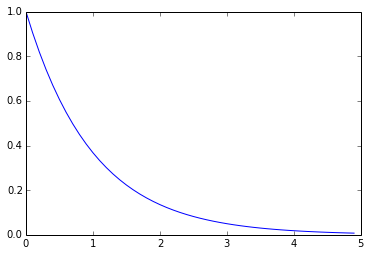

In [29]:
tempo = arange( 0.0, 5.0, 0.1 )


def decadimento(s, t):
    return -s


s_in_time = odeint( decadimento, (1.0), tempo )


plot(tempo, s_in_time)

In [3]:
def oscillatore( s, t ):
    x = s[0]
    v = s[1]
    return ( +v, -x )

In [4]:
tempo = arange( 0.0, 5.0, 0.1 )

In [5]:
res = odeint( oscillatore, (0.0, 10.0), tempo )

In [6]:
x, v = res.T

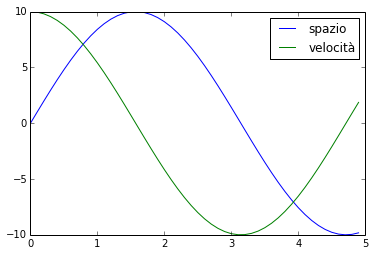

In [7]:
plot( tempo, x, label='spazio')
plot( tempo, v, label=u'velocità' )
legend()

# fit dei dati osservati

In [8]:
from scipy.optimize import curve_fit

In [17]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, **kw)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An N-length sequence or an (k,N)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : N-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or M-length sequence
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be determined using introspection, otherwise a ValueError
        is raised).
    sigma : None 

In [10]:
x_obs = x + randn(len(x))

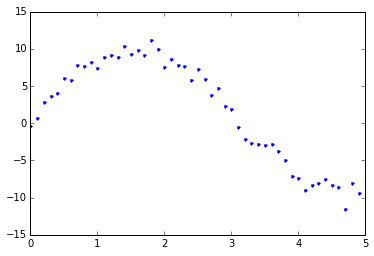

In [21]:
plot(tempo, x_obs, '.')

In [15]:
def evaluate_x(tempo, k):
    def oscillatore( s, t ):
        x = k*s[0]
        v = s[1]
        return ( +v, -x )
    res = odeint( oscillatore, (0.0, 10.0), tempo )
    x, v = res.T
    return x

In [19]:
parameters, covariance = curve_fit(evaluate_x, tempo, x_obs, [0.1])

In [20]:
parameters

array([ 0.9935441])

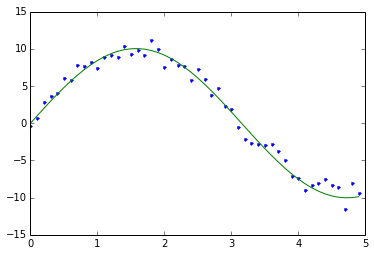

In [23]:
plot(tempo, x_obs, '.')
plot(tempo, evaluate_x(tempo, parameters[0]))